In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

In [9]:
df_bank = pd.read_csv('../data/output/bank-additional_01.csv', index_col=False)
df_bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,ID
0,0,NaN,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,married,high.school,NaN,0.0,0.0,telephone,149,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,married,high.school,0.0,1.0,0.0,telephone,226,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,married,high.school,0.0,0.0,1.0,telephone,307,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [10]:
df = df_bank.copy()

In [11]:
df.isnull().mean()*100

Unnamed: 0         0.000000
age               11.906977
job                0.802326
marital            0.197674
education          4.202326
default           20.886047
housing            2.386047
loan               2.386047
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.095349
cons.conf.idx      0.000000
euribor3m         21.525581
nr.employed        0.000000
y                  0.000000
date               0.576744
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64

In [12]:
df_nulos = df.loc[ : , df.isnull().sum()>0]
df_nulos

,age,job,marital,education,default,housing,loan,cons.price.idx,euribor3m,date
0,NaN,housemaid,married,basic.4y,0.0,0.0,0.0,"93,994","4,857",2-agosto-2019
1,57.0,services,married,high.school,NaN,0.0,0.0,"93,994",NaN,14-septiembre-2016
2,37.0,services,married,high.school,0.0,1.0,0.0,"93,994","4,857",15-febrero-2019
3,40.0,admin.,married,basic.6y,0.0,0.0,0.0,"93,994",NaN,29-noviembre-2015
4,56.0,services,married,high.school,0.0,0.0,1.0,"93,994",NaN,29-enero-2017
...,...,...,...,...,...,...,...,...,...,...
42995,NaN,admin.,married,university.degree,0.0,0.0,0.0,"93,444",NaN,13-octubre-2015
42996,34.0,technician,married,professional.course,0.0,1.0,1.0,"93,2",NaN,17-marzo-2018
42997,NaN,blue-collar,single,basic.6y,0.0,1.0,0.0,"93,918",NaN,15-septiembre-2016
42998,NaN,admin.,married,university.degree,NaN,0.0,0.0,"93,918","4,958",23-septiembre-2019


In [21]:
df["default"].value_counts()

default
0.0    34016
1.0        3
Name: count, dtype: int64

In [13]:
for col in df_nulos.select_dtypes(include="O").columns:
    print(col.upper())
    display(df[col].value_counts()/df.shape[0]*100)
    print("_______________")

JOB


job
admin.           25.286047
blue-collar      22.451163
technician       16.339535
services          9.679070
management        7.093023
retired           4.162791
entrepreneur      3.539535
self-employed     3.462791
housemaid         2.611628
unemployed        2.472093
student           2.100000
Name: count, dtype: float64

_______________
MARITAL


marital
married     60.462791
single      28.151163
divorced    11.188372
Name: count, dtype: float64

_______________
EDUCATION


education
university.degree      29.586047
high.school            23.081395
basic.9y               14.672093
professional.course    12.737209
basic.4y               10.130233
basic.6y                5.548837
illiterate              0.041860
Name: count, dtype: float64

_______________
CONS.PRICE.IDX


cons.price.idx
93,994    18.460465
93,918    16.132558
92,893    13.918605
93,444    12.439535
94,465    10.516279
93,2       8.676744
93,075     5.934884
92,201     1.867442
92,963     1.725581
92,431     1.095349
92,649     0.872093
94,215     0.744186
94,199     0.734884
92,843     0.693023
92,379     0.637209
93,369     0.630233
94,027     0.562791
94,055     0.548837
93,876     0.520930
94,601     0.493023
92,469     0.427907
92,713     0.416279
93,749     0.416279
94,767     0.302326
93,798     0.111628
92,756     0.025581
Name: count, dtype: float64

_______________
EURIBOR3M


euribor3m
4,857    5.318605
4,962    4.939535
4,963    4.695349
4,961    3.706977
4,964    2.241860
           ...   
5,045    0.002326
4,921    0.002326
0,895    0.002326
0,956    0.002326
0,953    0.002326
Name: count, Length: 309, dtype: float64

_______________
DATE


date
28-febrero-2018      0.220930
28-febrero-2016      0.218605
28-febrero-2015      0.213953
28-febrero-2017      0.206977
28-febrero-2019      0.197674
                       ...   
17-diciembre-2018    0.025581
21-diciembre-2019    0.023256
14-abril-2015        0.023256
4-abril-2017         0.023256
20-noviembre-2015    0.023256
Name: count, Length: 1825, dtype: float64

_______________


In [14]:
def subplot_col_cat (dataframe):

    #seleciona columnas categoricas
    categorical_cols= dataframe.select_dtypes(include=["object", "category"]).columns

    if len(categorical_cols) == 0:
        return "No hay columnas categóricas en el DataFrame"
    
    #configurar el tamaño de la figura

    num_cols = len(categorical_cols)
    rows = (num_cols+2) // 3 #calcular fiilas necesarias para 3 columnas for fila
    fig, axes = plt.subplots(rows, 3, figsize =(15, rows *5))
    axes = axes.flatten() # convertir a eje plano

    #generar grafico para cada columna categorica:

    for i, col in enumerate(categorical_cols):
        sns.countplot( data= dataframe, x=col, ax=axes[i], hue=col, palette="tab10", legend =False)
        axes[i].set_title(f"Distribucion de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis="x", rotation=90)
    #eliminar ejes sobrantes si hay menos columnas que subplots

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    #ajustar diseño
    plt.tight_layout()
    plt.show()

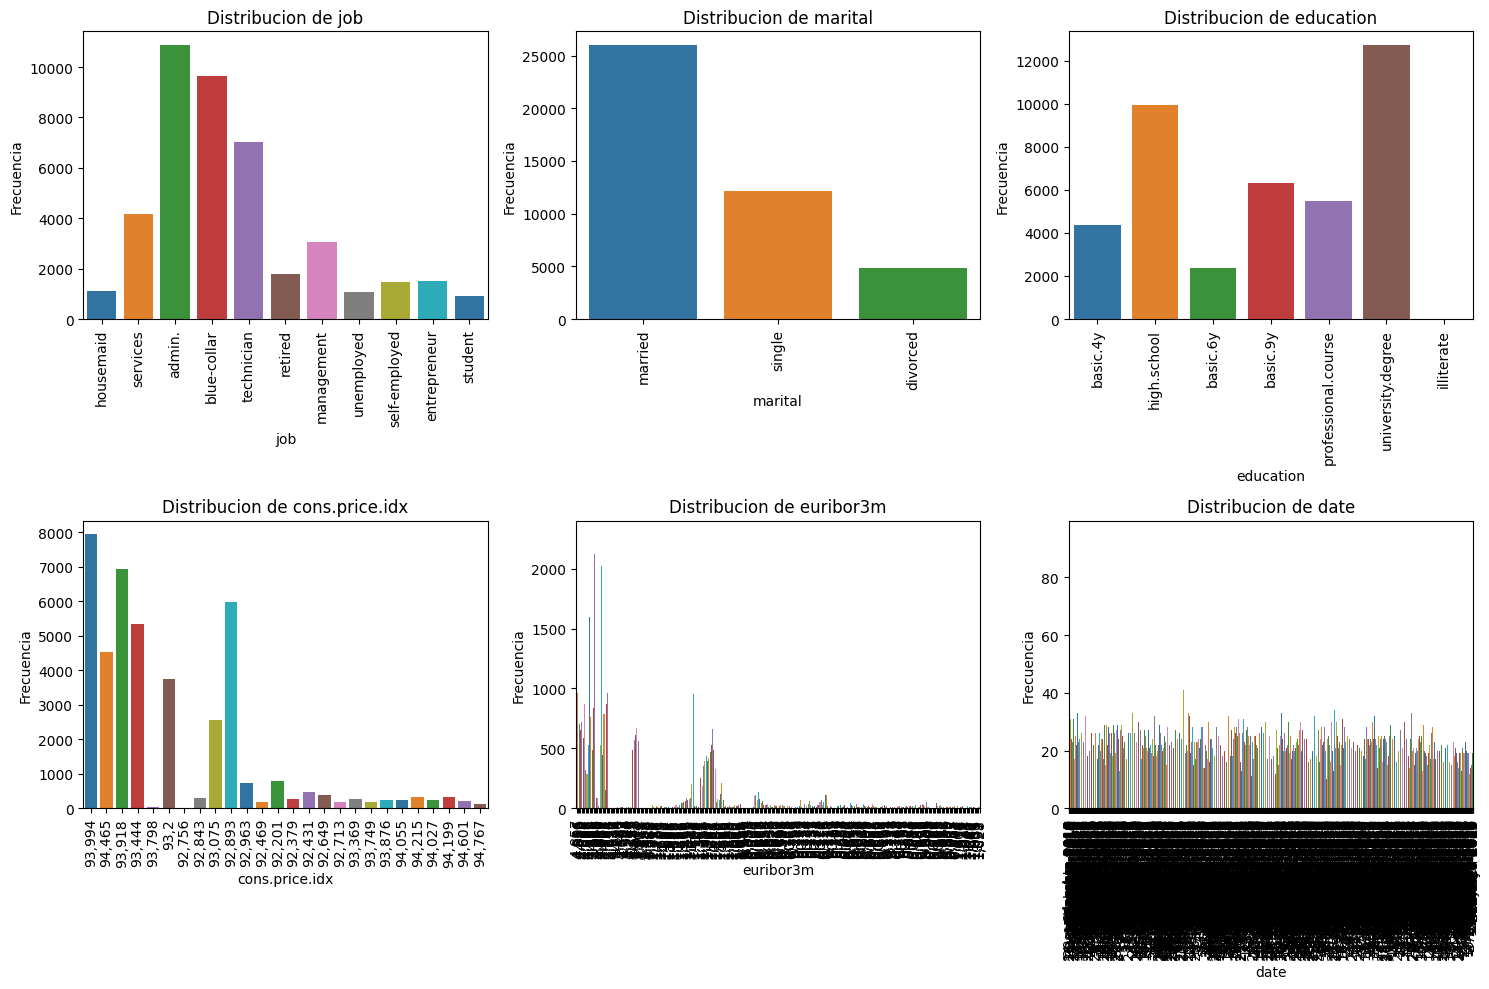

None


In [15]:
result = subplot_col_cat (df_nulos)
print(result)
    

In [16]:
df_nulos.select_dtypes(include="object").isnull().mean()*100

job                0.802326
marital            0.197674
education          4.202326
cons.price.idx     1.095349
euribor3m         21.525581
date               0.576744
dtype: float64

In [18]:
#comprobar si los nulos tienen alguna explicacion

df_default_yes = df[df["default"] == 1]
df_default_yes.isnull().mean()*100

Unnamed: 0         0.000000
age               33.333333
job                0.000000
marital            0.000000
education          0.000000
default            0.000000
housing            0.000000
loan               0.000000
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
date               0.000000
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64

In [19]:
df_default_no = df[df["default"] == 0]
df_default_no.isnull().mean()*100

Unnamed: 0         0.000000
age               11.800329
job                0.552681
marital            0.214605
education          3.639464
default            0.000000
housing            2.331256
loan               2.331256
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.114182
cons.conf.idx      0.000000
euribor3m         21.460489
nr.employed        0.000000
y                  0.000000
date               0.605597
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64